# Gaussian Derivative Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This filter uses kernel created by convolving a partial derivative kernel and a Gaussian kernel to provide a smooth partial derivative image for any Two Dimensional input. Note that this filter is similar to `filter.partialDerivative()` (ADD LINK), however this filter differs based on the convolution of the partial derivative kernel with the gaussian kernel, providing a smoother result.

This is how the op is called:

In [2]:
ij.op().help('derivativeGauss')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.derivativeGauss.DefaultDerivativeGauss(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		int[] in2,
		double sigma)

Here we have an image of tree rings ([Source](http://imagej.net/images/Dot_Blot.jpg)).

[INFO] Populating metadata
[INFO] Populating metadata


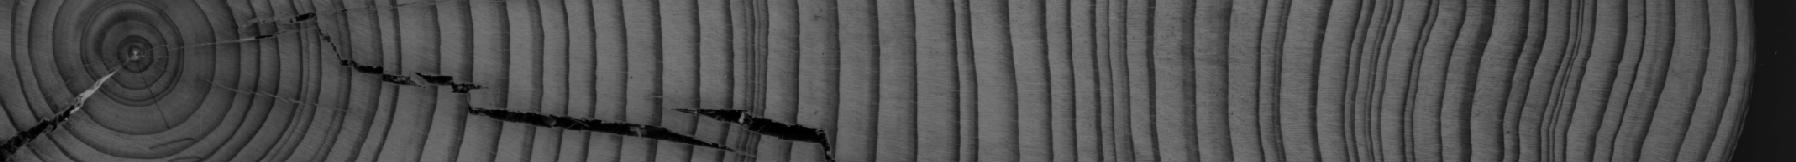

In [3]:
input = ij.scifio().datasetIO().open("https://imagej.net/images/Tree_Rings.jpg")
ij.notebook().display(input)                                     

Let's say that we want to find the distance between each of the rings to determine the rate of growth of this tree. If we just found the local minimums across the x-dimension we could find the distance between rings in most scenarios but small cracks in the wood as well as the region outside the wood could provide bad data. To work around this we can use the second partial derivative along the radius of the wood (the x-dimension in our case) to find the ring locations more accurately.

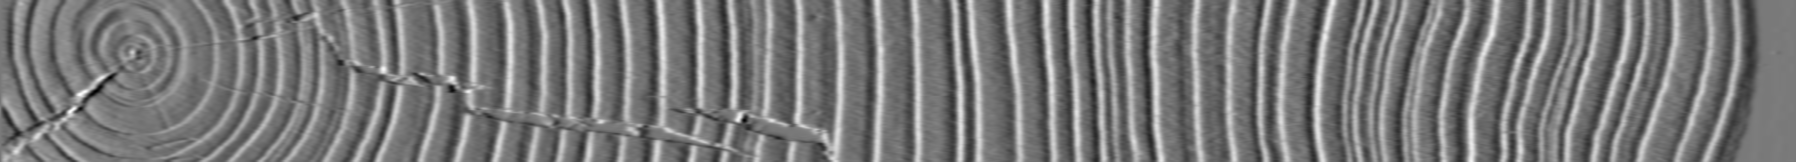

In [4]:
import net.imglib2.type.numeric.real.DoubleType

derivatives = [1, 0] as int[]

sigma = 3

converted = ij.op().convert().float64(input)
actualOutput = ij.op().create().img(input, new DoubleType())
ij.op().run("derivativeGauss", actualOutput, converted, derivatives, sigma)
ij.notebook().display(actualOutput);

Since we are moving from low values (the rings) to high values (early wood after the tree rings) all we would have to do at this point is traverse the image horizontally from the center of the tree to the edge and measure the distance from one local minimum to the next.

If, for some reason, we are more interested in identifying radial cracks in our logs, we could instead take the second partial derivative with respect to the y-dimension of the image:

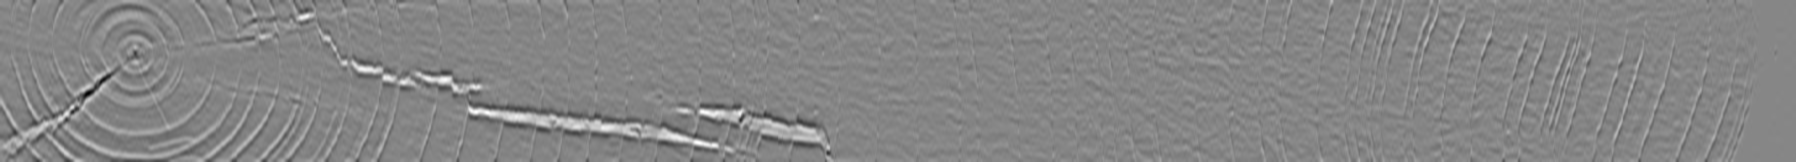

In [5]:
derivatives = [0, 2] as int[]

ij.op().run("derivativeGauss", actualOutput, converted, derivatives, sigma)
ij.notebook().display(actualOutput)

Taking the second partial derivative with respect to the y-dimension fades all of the horizontal lines and highlights any horizontally-oriented structures such as radial cracks, making it easy to tell whether or not they are present in the image.